This notebook is demonstrate how to extract the main frequency from a fragment of speach and translate into rhytmic roboting gesturing.

To obtain the an accurate FFT (which works on the assumption that the signal being processed is periodic) I need to split the sound file into smaller (pseudo-periodic) sequences.

In [8]:
# Useful imports
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from IPython.display import Audio
from scipy.fftpack import fft, ifft
%matplotlib inline

In [3]:
# reading the speech file
rate, data = wavfile.read('speech.wav')
print rate, data
print np.max(data)
print np.min(data)

44100 [    1    -1    -1 ..., -6699 -7052 -7399]
24154
-24146


In [4]:
fig, ax = plt.subplots(1, figsize = (10,3.5)) #Graph initial audio sample
ax.stem(range(441), data[0:441])
ax.set_xlabel("$n$")
ax.set_ylabel("Signal amplitude")

Audio("speech.wav")

Will try applying an FFT on some 10 ms chunk (441 samples)

66
The dominant frequency is  100 Hz


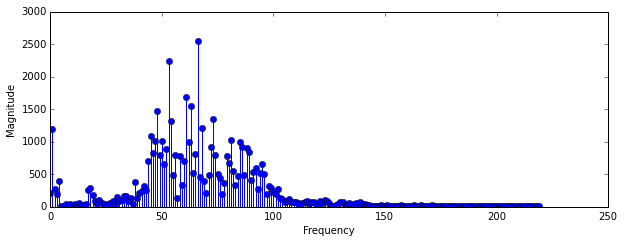

In [18]:
cut_data = data[441*100:441*101]
Cut_data = fft(cut_data) / (441/2.0)

fig, ax = plt.subplots(1, figsize = (10,3.5))
ax.stem(range(441/2), np.abs(Cut_data[0:441/2]))
ax.set_xlabel("Frequency")
ax.set_ylabel("Magnitude")

print np.argmax(abs(Cut_data[0:441/2]))
print "The dominant frequency is ", 66 * (44100/441) % 500, "Hz"

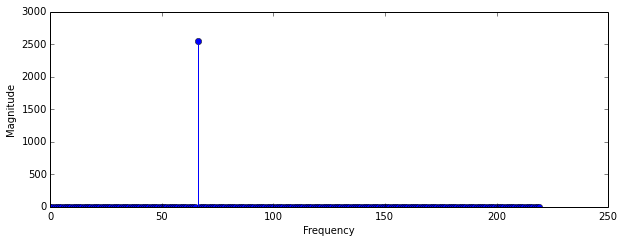

In [10]:
Filtered_data = [Cut_data[x] if x == np.argmax(abs(Cut_data[0:441/2])) else 0 for x in range(len(Cut_data[0:441]))]
fig, ax = plt.subplots(1, figsize = (10,3.5))
ax.stem(range(len(Filtered_data[0:441/2])), np.abs(Filtered_data[0:441/2]))
ax.set_xlabel("Frequency")
ax.set_ylabel("Magnitude")

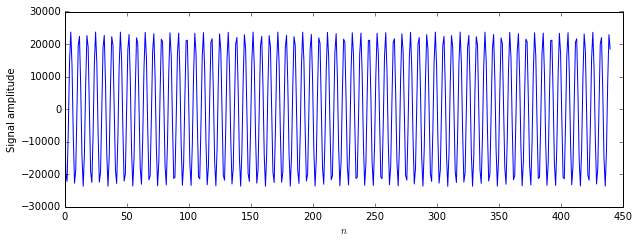

In [14]:
recovered_data = np.int16(np.real(ifft(Filtered_data))* (2**12))
fig, ax = plt.subplots(1, figsize = (10,3.5)) #Graph initial audio sample
ax.plot(range(len(recovered_data)), recovered_data)
ax.set_xlabel("$n$")
ax.set_ylabel("Signal amplitude")

wavfile.write(data=np.tile(recovered_data, 1000), rate=rate, filename="test_isolation.wav")
Audio("test_isolation.wav")